In [1]:
code_lowered

code_lowered (generic function with 2 methods)

\begin{align*}
\dot{x}(t) &= f(x(t)) + u(t) g(x(t)), \quad x(0) = (c_0, p_0, 0), \\
x(t) &= (c(t), p(t), x_3(t))^\top \in \mathbb{R}^3,
\end{align*}

In [3]:
         # Complete OCP Optimal Algae Control Model

using OptimalControl
using NLPModelsIpopt
using Plots
using MadNLP

# ------------------ Parameters ------------------
kP = 1.6
K = 140.0
I0 = 300.0
α = 0.1
L = 50.0
kR_bar = 1.5
z_bar = 35.0
n = 3
tf = 100.0

# ------------------ Biological Functions ------------------
function I_light(z)
    return I0 * exp(-α * z)
end

function vP(p, z)
    return kP * p * I_light(z) / (K + p * I_light(z))
end

function kR(z)
    return kR_bar * z^n / (z_bar^n + z^n)
end

# ------------------ OptimalControl Solution ------------------
function OCP(z0=20)
    ocp = @def begin
        t ∈ [0, tf], time
        x = (c, p, z) ∈ R^3, state
        U ∈ R^2, control
        c(0) == 0.2
        p(0) == 0.2
        z(0) == z0
        0 ≤ U(t)[1] ≤ 1
        -1 ≤ U(t)[2] ≤ 1
        0 ≤ c(t) ≤ 1
        0 ≤ p(t) ≤ 1
        0 ≤ z(t) ≤ L
        c(t) + p(t) ≤ 1
        ẋ(t) == [
            vP(p(t), z(t)) * (1 - c(t)) - kR(z(t)) * c(t) * (1 - c(t) - p(t)),
            U(t)[1] * kR(z(t)) * c(t) * (1 - c(t) - p(t)) - vP(p(t), z(t)) * p(t),
            U(t)[2]
        ]
        ∫(vP(p(t), z(t))) → max
    end

    sol1 = solve(ocp, :direct, :adnlp, :madnlp, grid_size=50, display=false)
    sol2 = solve(ocp, :direct, :adnlp, :madnlp, init=sol1, grid_size=100, display=false)
    sol3 = solve(ocp, :direct, :adnlp, :madnlp, init=sol2, grid_size=200, display=false)
    sol4 = solve(ocp, :direct, :adnlp, :ipopt, init=sol3, grid_size=300, display=false)
    sol5 = solve(ocp, :direct, :adnlp, :ipopt, init=sol4, grid_size=400, display=false)
    sol6 = solve(ocp, :direct, :adnlp, :ipopt, init=sol5, grid_size=500, display=false)
    sol7 = solve(ocp, :direct, :adnlp, :ipopt, init=sol6, grid_size=600, display=false)
    sol8 = solve(ocp, :direct, :adnlp, :ipopt, init=sol7, grid_size=700, display=false)
    sol = solve(ocp, :direct, :adnlp, :ipopt, init=sol8, grid_size=800, display=true)

    # ------------------ Results Visualization ------------------
    plt = plot(sol)
    display(plt)

    # ------------------ Extract and Print Solution Details ------------------
    λ = costate(sol)
    x = state(sol)
    U = control(sol)
    u = t -> U(t)[1]
    v = t -> U(t)[2]
    T = time_grid(sol)

    for i in eachindex(T)
        t = T[i]
        λ_val = λ(t)
        x_val = x(t)
        u_val = u(t)
        v_val = v(t)
        println("t = $(round(t, digits=2)) │ λ = $(round.(λ_val, digits=4)) │ c = $(round(x_val[1], digits=4)) │ p = $(round(x_val[2], digits=4)) │ z = $(round(x_val[3], digits=4)) │ u = $(round(u_val, digits=4)) │ v = $(round(v_val, digits=4))")
    end
    println("Maximum objective value ∫vP = ", objective(sol))   
end 

OCP (generic function with 2 methods)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_dwx0VCTQle\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_ZuvsfuFe1q\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_7iZuveDOra\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_HYNQz856Dg\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 3.74e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_JeBIBkdyX6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_165KB8nY7w\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


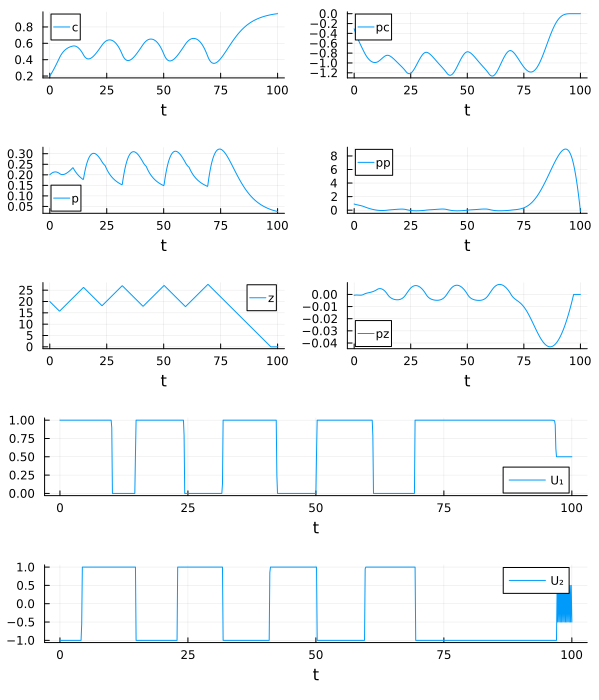

t = 0.0 │ λ = [-0.3068, 0.9066, -0.0007] │ c = 0.2 │ p = 0.2 │ z = 20.0 │ u = 1.0 │ v = -1.0
t = 0.12 │ λ = [-0.324, 0.8941, -0.0007] │ c = 0.2053 │ p = 0.2013 │ z = 19.875 │ u = 1.0 │ v = -1.0
t = 0.25 │ λ = [-0.3409, 0.882, -0.0006] │ c = 0.2107 │ p = 0.2026 │ z = 19.75 │ u = 1.0 │ v = -1.0
t = 0.38 │ λ = [-0.3575, 0.8703, -0.0006] │ c = 0.2162 │ p = 0.2038 │ z = 19.625 │ u = 1.0 │ v = -1.0
t = 0.5 │ λ = [-0.3737, 0.859, -0.0006] │ c = 0.2217 │ p = 0.2049 │ z = 19.5 │ u = 1.0 │ v = -1.0
t = 0.62 │ λ = [-0.3897, 0.8479, -0.0006] │ c = 0.2274 │ p = 0.206 │ z = 19.375 │ u = 1.0 │ v = -1.0
t = 0.75 │ λ = [-0.4053, 0.8372, -0.0005] │ c = 0.2332 │ p = 0.207 │ z = 19.25 │ u = 1.0 │ v = -1.0
t = 0.88 │ λ = [-0.4207, 0.8267, -0.0005] │ c = 0.2391 │ p = 0.2079 │ z = 19.125 │ u = 1.0 │ v = -1.0
t = 1.0 │ λ = [-0.4358, 0.8165, -0.0005] │ c = 0.2451 │ p = 0.2088 │ z = 19.0 │ u = 1.0 │ v = -1.0
t = 1.12 │ λ = [-0.4507, 0.8065, -0.0005] │ c = 0.2511 │ p = 0.2096 │ z = 18.875 │ u = 1.0 │ v = -1.0
t 

In [5]:
OCP(20)